In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.naive_bayes import GaussianNB 

In [2]:
df=pd.read_csv("Iris .csv")

In [3]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


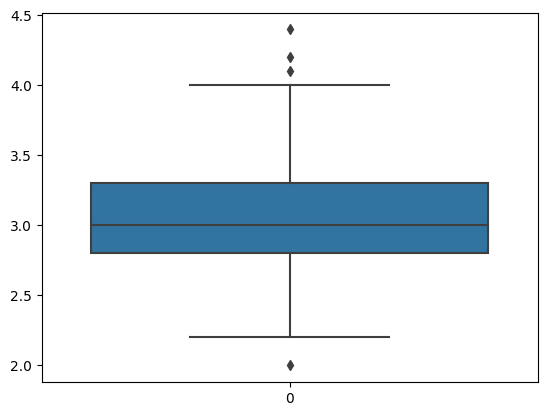

In [6]:
sns.boxplot(df['SepalWidthCm'])
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)
IQR=q3-q1

ll= q1 -(IQR*1.5)
ul= q3+ (IQR*1.5)


In [7]:
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [8]:
df['SepalWidthCm'][(df['SepalWidthCm'] < ll )]=df['SepalWidthCm'].median()

/var/folders/qc/cmptxd755xqcbbfj7s1lvfx80000gn/T/ipykernel_29212/851578212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SepalWidthCm'][(df['SepalWidthCm'] < ll )]=df['SepalWidthCm'].median()


In [9]:
df['SepalWidthCm'][(df['SepalWidthCm'] > ul )]=df['SepalWidthCm'].median()

/var/folders/qc/cmptxd755xqcbbfj7s1lvfx80000gn/T/ipykernel_29212/125651701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SepalWidthCm'][(df['SepalWidthCm'] > ul )]=df['SepalWidthCm'].median()


<Axes: >

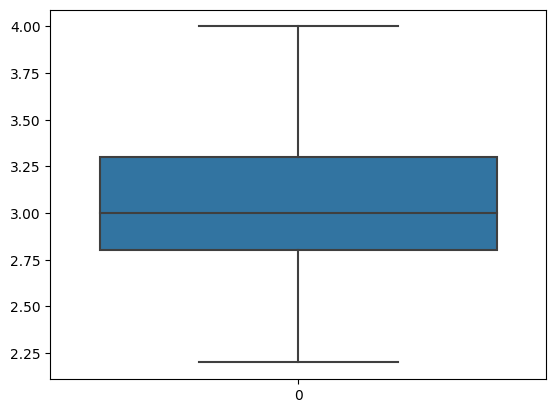

In [10]:
sns.boxplot(df['SepalWidthCm'])

In [30]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
y_train=sc.fit_transform(y_train)

In [32]:
gs=GaussianNB()

In [33]:
gs.fit(X_train,y_train)

GaussianNB()

In [35]:
y_predict=gs.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
con=confusion_matrix(y_test,y_predict)
con

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  3,  9]])

In [43]:
def getScore(tp,fn,fp,tn):
    print("Accuracy : ", accuracy_score(y_test,y_predict))
    print("Error rate : ",(fn+fp)/tp+fn+fp+tn)
    print("Precision : ",tp/tp+fp)
    print("Recall : ",tp/tp+fn)

In [44]:
# iris_setosa
tp=con[0][0]
fn=con[0][1]+con[0][2]
fp=con[1][0]+con[2][0]
tn=con[1][1]+con[1][2]+con[2][1]+con[2][2]
getScore(tp,fn,fp,tn)

Accuracy :  0.9210526315789473
Error rate :  26.0
Precision :  1.0
Recall :  1.0


In [45]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38

